In [0]:
#Setup Spark Configuration to read data from ADLS directly using Access key
spark.conf.set(
    "fs.azure.account.key.vaishaliadls.dfs.core.windows.net",
    "G1ovLwcY96aWU6rKq7LRBzieQh14UQ+zLgS7QFGeVZHEAxvW9bQFu00INYmj1IjiLjxJnToXuDBf+AStINODSw==")

In [0]:
#List all the files in the container
dbutils.fs.ls("abfss://adlscontainer@vaishaliadls.dfs.core.windows.net/")

Out[8]: [FileInfo(path='abfss://adlscontainer@vaishaliadls.dfs.core.windows.net/bank_data.csv', name='bank_data.csv', size=398027, modificationTime=1687755003000)]

In [0]:
#Set the file path 
file_path="abfss://adlscontainer@vaishaliadls.dfs.core.windows.net/"
#Read the file into a dataframe
df=spark.read.format("csv").option("header","false").load(file_path)

In [0]:
#displaying 10 records alone 
df.show(10)

+----+---+-------------+-------+---------+---+----+---+---+--------+----+----+----+----+----+----+-------+----+
| _c0|_c1|          _c2|    _c3|      _c4|_c5| _c6|_c7|_c8|     _c9|_c10|_c11|_c12|_c13|_c14|_c15|   _c16|_c17|
+----+---+-------------+-------+---------+---+----+---+---+--------+----+----+----+----+----+----+-------+----+
|1001| 30|   unemployed|married|  primary| no|1787| no| no|cellular|  19| oct|  79|   1|  -1|   0|unknown|  no|
|1002| 33|     services|married|secondary| no|4789|yes|yes|cellular|  11| may| 220|   1| 339|   4|failure|  no|
|1003| 35|   management| single| tertiary| no|1350|yes| no|cellular|  16| apr| 185|   1| 330|   1|failure|  no|
|1004| 30|   management|married| tertiary| no|1476|yes|yes| unknown|   3| jun| 199|   4|  -1|   0|unknown|  no|
|1005| 59|  blue-collar|married|secondary| no|   0|yes| no| unknown|   5| may| 226|   1|  -1|   0|unknown|  no|
|1006| 35|   management| single| tertiary| no| 747| no| no|cellular|  23| feb| 141|   2| 176|   3|failur

In [0]:
# Import the libraries SparkSession, StructType,StructField, StringType, IntegerType
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

In [0]:
# Create a spark session using getOrCreate() function
spark_session = SparkSession.builder.getOrCreate()

In [0]:
# Define the schema for the csv file
user_defined_schema = StructType([
    StructField('unique_sequence_id',
                IntegerType(), False),
    StructField('age',
                IntegerType(), True),
    StructField('job',
                StringType(), True),
    StructField('marital_status',
                StringType(), True),
    StructField('education',
                StringType(), True),
    StructField('default_credit',
                StringType(), True),
    StructField('balance',
                IntegerType(), True),
    StructField('housing',
                StringType(), True),
    StructField('loan',
                StringType(), True),
    StructField('contact',
                StringType(), True),
    StructField('day',
                IntegerType(), True),
    StructField('month',
                StringType(), True),
    StructField('duration',
                IntegerType(), True),
    StructField('campaign',
                IntegerType(), True),
    StructField('pdays',
                IntegerType(), True),
    StructField('previous',
                IntegerType(), True),
    StructField('poutcome',
                StringType(), True),
    StructField('opened_new_td_act_no_yes',
                StringType(), True)

])

In [0]:
# covert the dataframe to user_defined _schema
df=spark.read.format("csv").schema(user_defined_schema).option("header","true").load(file_path)
# Display the updated schema
df.printSchema()

root
 |-- unique_sequence_id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default_credit: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- opened_new_td_act_no_yes: string (nullable = true)



In [0]:
#display the first few records 
df.show(5)

+------------------+---+-----------+--------------+---------+--------------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|unique_sequence_id|age|        job|marital_status|education|default_credit|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+------------------+---+-----------+--------------+---------+--------------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|              1002| 33|   services|       married|secondary|            no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure|                      no|
|              1003| 35| management|        single| tertiary|            no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure|                      no|
|              1004| 30| management|       married| tertiary|            no|   1

In [0]:
# Get columns count
cols = len(df.columns)
print(f"DataFrame Columns count : {cols}")

DataFrame Columns count : 18


In [0]:
# Get rows count without the header
rows = df.count()-1
print(f"DataFrame Columns count : {rows}")

DataFrame Columns count : 4519


In [0]:
## To get the summary statistics (mean, standard deviance, min ,max , count) of numerical columns in a DataFrame
df.describe().show()

+-------+------------------+------------------+-------+--------------+---------+--------------+------------------+-------+----+--------+------------------+-----+------------------+-----------------+------------------+------------------+--------+------------------------+
|summary|unique_sequence_id|               age|    job|marital_status|education|default_credit|           balance|housing|loan| contact|               day|month|          duration|         campaign|             pdays|          previous|poutcome|opened_new_td_act_no_yes|
+-------+------------------+------------------+-------+--------------+---------+--------------+------------------+-------+----+--------+------------------+-----+------------------+-----------------+------------------+------------------+--------+------------------------+
|  count|              4520|              4520|   4520|          4520|     4520|          4520|              4520|   4520|4520|    4520|              4520| 4520|              4520|       

In [0]:
#getting the minimum values of each column 
df.agg({'age': 'min'}).show()
df.agg({'balance': 'min'}).show()
df.agg({'duration': 'min'}).show()
df.agg({'campaign': 'min'}).show()
df.agg({'pdays': 'min'}).show()
df.agg({'poutcome': 'min'}).show()

+--------+
|min(age)|
+--------+
|      19|
+--------+

+------------+
|min(balance)|
+------------+
|       -3313|
+------------+

+-------------+
|min(duration)|
+-------------+
|            4|
+-------------+

+-------------+
|min(campaign)|
+-------------+
|            1|
+-------------+

+----------+
|min(pdays)|
+----------+
|        -1|
+----------+

+-------------+
|min(poutcome)|
+-------------+
|      failure|
+-------------+



In [0]:
#getting the maximum values of each column 
df.agg({'age': 'max'}).show()
df.agg({'balance': 'max'}).show()
df.agg({'duration': 'max'}).show()
df.agg({'campaign': 'max'}).show()
df.agg({'pdays': 'max'}).show()
df.agg({'poutcome': 'max'}).show()

+--------+
|max(age)|
+--------+
|      87|
+--------+

+------------+
|max(balance)|
+------------+
|       71188|
+------------+

+-------------+
|max(duration)|
+-------------+
|         3025|
+-------------+

+-------------+
|max(campaign)|
+-------------+
|           50|
+-------------+

+----------+
|max(pdays)|
+----------+
|       871|
+----------+

+-------------+
|max(poutcome)|
+-------------+
|      unknown|
+-------------+



In [0]:
#Filtering columns having the negative value 
from pyspark.sql.functions import col,when
filtered_df=df.filter(col("balance")>=0)
filtered_df.show(20)
filtered_df.count()

+------------------+---+-------------+--------------+---------+--------------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|unique_sequence_id|age|          job|marital_status|education|default_credit|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+------------------+---+-------------+--------------+---------+--------------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|              1002| 33|     services|       married|secondary|            no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure|                      no|
|              1003| 35|   management|        single| tertiary|            no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure|                      no|
|              1004| 30|   management|       married| tertiary|       

In [0]:
# Replacing negative columns with zero
df=df.withColumn("balance",when(col("balance") < 0,0).otherwise(col("balance")))
df.show(20)

+------------------+---+-------------+--------------+---------+--------------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|unique_sequence_id|age|          job|marital_status|education|default_credit|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+------------------+---+-------------+--------------+---------+--------------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|              1002| 33|     services|       married|secondary|            no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure|                      no|
|              1003| 35|   management|        single| tertiary|            no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure|                      no|
|              1004| 30|   management|       married| tertiary|       

In [0]:
## Create SQL view/table from the dataframe
df.createOrReplaceTempView("dftable")

In [0]:
# Verify the target distribution

target_distribution=df.groupBy("opened_new_td_act_no_yes").count()
target_distribution.show()

+------------------------+-----+
|opened_new_td_act_no_yes|count|
+------------------------+-----+
|                      no| 3999|
|                     yes|  521|
+------------------------+-----+



In [0]:
#Find the pairwise frequency between target and loan columns
pairwise_freq=df.groupBy("opened_new_td_act_no_yes","loan").count()
pairwise_freq.show()

+------------------------+----+-----+
|opened_new_td_act_no_yes|loan|count|
+------------------------+----+-----+
|                      no|  no| 3351|
|                      no| yes|  648|
|                     yes| yes|   43|
|                     yes|  no|  478|
+------------------------+----+-----+



In [0]:
#fitlering the target column where we have yes 
td_yes=df.filter(df["opened_new_td_act_no_yes"]=="yes")
# term deposit opted for different job categories 
each_job_td_yes=td_yes.groupBy("job","opened_new_td_act_no_yes").count()
each_job_td_yes.show()

+-------------+------------------------+-----+
|          job|opened_new_td_act_no_yes|count|
+-------------+------------------------+-----+
|      retired|                     yes|   54|
|       admin.|                     yes|   58|
|   management|                     yes|  131|
|  blue-collar|                     yes|   69|
|      unknown|                     yes|    7|
|self-employed|                     yes|   20|
|   unemployed|                     yes|   13|
|    housemaid|                     yes|   14|
|   technician|                     yes|   83|
|     services|                     yes|   38|
| entrepreneur|                     yes|   15|
|      student|                     yes|   19|
+-------------+------------------------+-----+



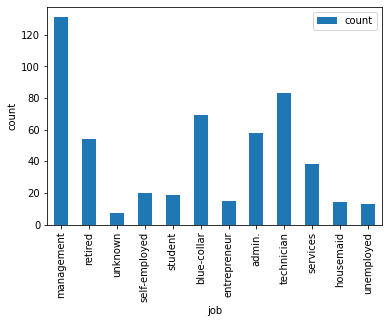

In [0]:
#Data Visualization . Plotting Job vs Targets who have yes for Term Deposits
# convert pyspark dataframe to pandas dataframe 
#first we filter the dataframe for the rows which have only yes for td, then group the rows by Jobs and then plot Jobs vs the count 
import pandas as pd
import matplotlib.pyplot as plt
pandas_df=df.filter(df["opened_new_td_act_no_yes"]=="yes").groupBy("job").count().toPandas()
pandas_df.plot(x="job",y="count",kind="bar")
plt.xlabel("job")
plt.ylabel("count")
plt.show()

In [0]:
#fitlering the target column where we have no 
td_no=df.filter(df["opened_new_td_act_no_yes"]=="no")
# term deposit  not opted for different job categories 
each_job_td_no=td_yes.groupBy("job","opened_new_td_act_no_yes").count()
each_job_td_no.show()

+-------------+------------------------+-----+
|          job|opened_new_td_act_no_yes|count|
+-------------+------------------------+-----+
|      retired|                     yes|   54|
|       admin.|                     yes|   58|
|   management|                     yes|  131|
|  blue-collar|                     yes|   69|
|      unknown|                     yes|    7|
|self-employed|                     yes|   20|
|   unemployed|                     yes|   13|
|    housemaid|                     yes|   14|
|   technician|                     yes|   83|
|     services|                     yes|   38|
| entrepreneur|                     yes|   15|
|      student|                     yes|   19|
+-------------+------------------------+-----+



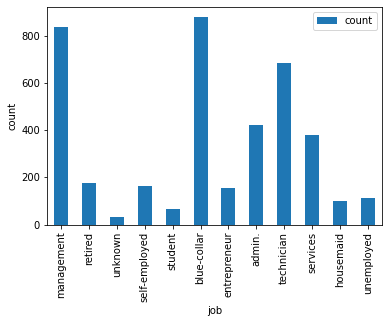

In [0]:
#Data Visualization . Plotting Job vs Targets who have no for Term Deposits
# convert pyspark dataframe to pandas dataframe 
#first we filter the dataframe for the rows which have only no for td, then group the rows by Jobs and then plot Jobs vs the count 
pandas_df=df.filter(df["opened_new_td_act_no_yes"]=="no").groupBy("job").count().toPandas()
pandas_df.plot(x="job",y="count",kind="bar")
plt.xlabel("job")
plt.ylabel("count")
plt.show()

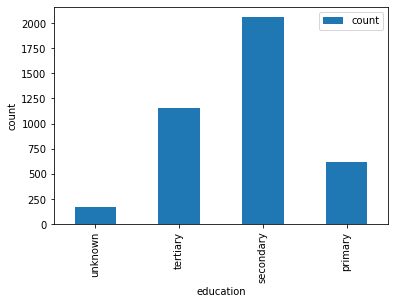

In [0]:
#term deposit not-opted for different education categories
pandas_df_education=df.filter(df["opened_new_td_act_no_yes"]=="no").groupBy("education").count().toPandas()
pandas_df_education.plot(x="education",y="count",kind="bar")
plt.xlabel("education")
plt.ylabel("count")
plt.show()

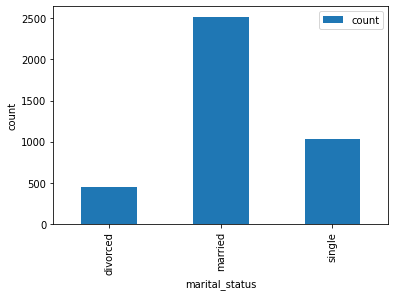

In [0]:
#term deposit not-opted for different marital status category
pandas_df_marital=df.filter(df["opened_new_td_act_no_yes"]=="no").groupBy("marital_status").count().toPandas()
pandas_df_marital.plot(x="marital_status",y="count",kind="bar")
plt.xlabel("marital_status")
plt.ylabel("count")
plt.show()

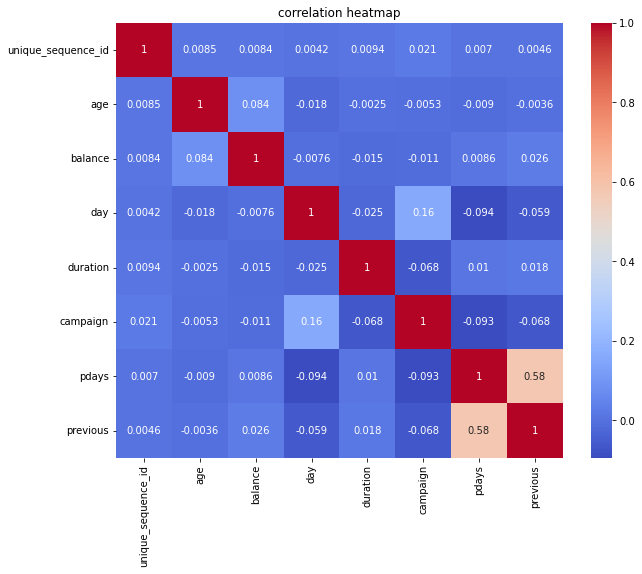

In [0]:
# Heatmap Visualization # heatmap represents correlation between different columns in a dataset with   being the highest correlation and 0 being the least 
import seaborn as sns
#1.convert ppyspark to pandas dataframe
pandas_df_heat_map=df.toPandas()
2.#Create a correlation Matrix which gives a sqaure matrix where each value represents the correlation between two columns 
correlation_matrix=pandas_df_heat_map.corr()
#plot heatmap where  the dimension are 10 and 8 respetively
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()


In [0]:
# Removing Null values ."na.drop()"" function provided by pyspark removes any rows that contains null values 
df=df.na.drop()
df.count()

Out[50]: 4520

In [0]:
#divide the datasdet into train and test data
train_ratio=0.8
test_ratio=1-train_ratio
# randomly split the dataframe into train and test dataframe using randomSplit() function
train_df,test_df=df.randomSplit([train_ratio,test_ratio],seed=200)
train_df.show(5)


+------------------+---+-------------+--------------+---------+--------------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|unique_sequence_id|age|          job|marital_status|education|default_credit|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+------------------+---+-------------+--------------+---------+--------------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|              1002| 33|     services|       married|secondary|            no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure|                      no|
|              1003| 35|   management|        single| tertiary|            no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure|                      no|
|              1004| 30|   management|       married| tertiary|       

In [0]:
train_df.count()

Out[59]: 3617

In [0]:
test_df.count()

Out[56]: 903